# Try reading HDSD dataset as Dask array

In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint


## Read without Dask

In [2]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wind-us.h5", 'r')  

In [3]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [4]:
list(f)  # list the datasets in the file

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [5]:
dset = f['windspeed_60m']

In [6]:
dset.id.id  # if this is an int, then you are using h5py!

'd-63038e98-4c15-11e7-81a9-0242ac110008'

In [7]:
dset.shape

(8760, 1602, 2976)

In [8]:
dset.dtype

dtype('float32')

In [9]:
chunks = dset.chunks
print(chunks)

[32, 50, 186]


In [10]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 155 GB!

167055022080

In [11]:
(dset.shape[0] * dset.shape[1] * dset.shape[2]) // (dset.chunks[0] * dset.chunks[1] * dset.chunks[2])  # lots a chunks

140335

In [12]:
dset.shape[1] * dset.shape[2] * 4  # 18 MB per slice

19070208

In [13]:
ntimes = dset.shape[0]

Read a subsampled slice at a random time step

In [14]:
tstep = randint(0, ntimes-1)  
%time data = dset[tstep,::8,::8]

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 5.6 s


CPU times: user 88 ms, sys: 8 ms, total: 96 ms
Wall time: 92.3 ms


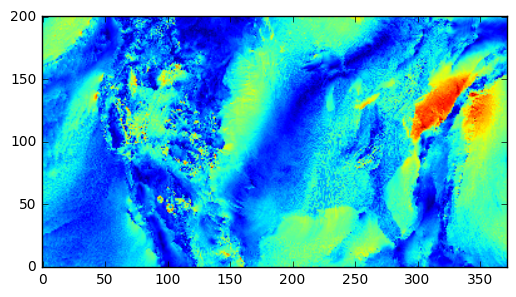

In [15]:
%time plt.imshow(data, origin="lower")

## Try with Dask

In [16]:
import dask.array as da
x = da.from_array(dset, chunks=chunks)

In [17]:
tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

CPU times: user 40 ms, sys: 4 ms, total: 44 ms
Wall time: 43.5 ms


CPU times: user 3.5 s, sys: 196 ms, total: 3.7 s
Wall time: 5.23 s


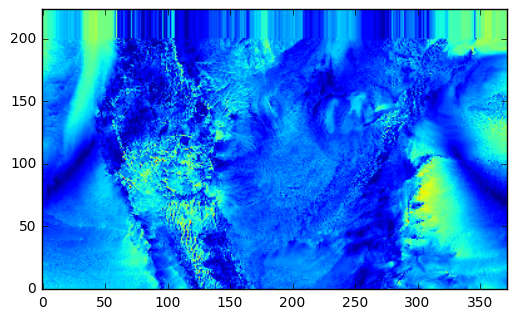

In [18]:
%time plt.imshow(data, origin="lower")